# Lesson 06 Notes: Joukowski Transformation

In [1]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

# 1. Complex Numbers in Python

In [2]:
a = 3
b = 3
z = a + b + 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (6+1j)
The type of the variable is  <class 'complex'>


### Exercises for HW 2

In [3]:
a = 2.75 + 3.69j
b = 8.55 - 6.13j
answer1 = a * b

answer2 = 1.4 * numpy.exp(5.32j)

c = 7.51 - 9.15j
d = 4.43 + 9.64j

answer3 = c / d

print('Answer 1: ', answer1)
print('Answer 2: ', answer2)
print('Answer 3: ', answer3)

Answer 1:  (46.1322+14.692000000000004j)
Answer 2:  (0.799270785858-1.1494199454j)
Answer 3:  (-0.4880897698448308-1.0033441577191493j)


# 2. Shapes created by the Joukowski transformation

(-3, 3)

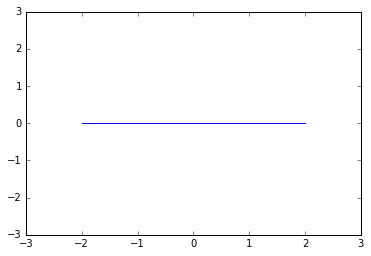

In [4]:
r = 1
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
z = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)

xi = joukowsky(z,c)
pyplot.plot(xi.real,xi.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

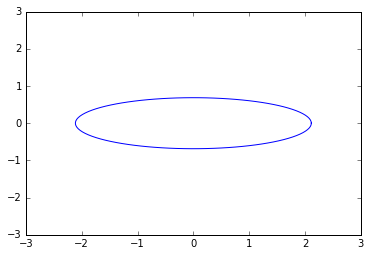

In [5]:
r = 1.4
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
z = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
xi = joukowsky(z,c)

pyplot.plot(xi.real,xi.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

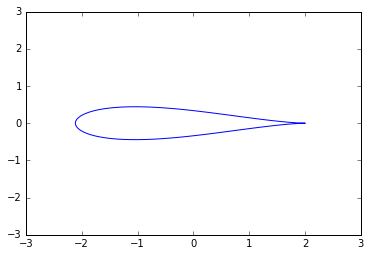

In [6]:
r = 1.2
c = 1
xc, yc = c-r,0
theta = numpy.linspace(0,2*numpy.pi,100)

z = (r*numpy.cos(theta) + xc)+((r*numpy.sin(theta) + yc)*1j)
xi = joukowsky(z,c)

pyplot.plot(xi.real,xi.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

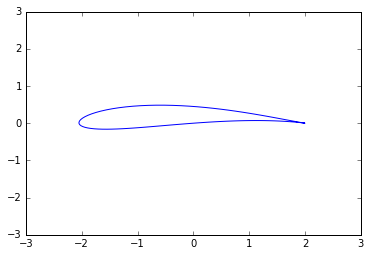

In [7]:
xc, yc = -0.1,0.1
c = 1
r = numpy.sqrt((c+xc)**2+yc**2)
theta = numpy.linspace(0,2*numpy.pi,100)

z = (r*numpy.cos(theta) - xc)+((r*numpy.sin(theta) + yc)*1j)
xi = joukowsky(z,c)

pyplot.plot(xi.real,xi.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

# 3. Grid points on the $z$-plane using polar coordinates

(-6, 6)

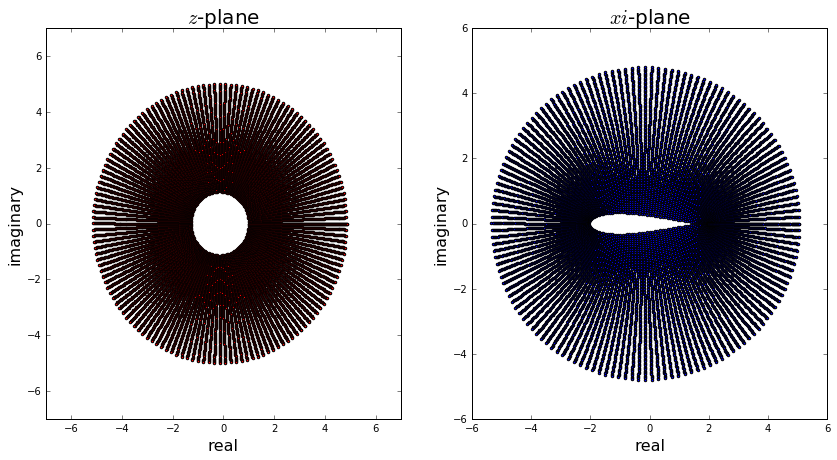

In [8]:
radius = 1.15
nr = 100
ntheta = 145

r = numpy.linspace(radius,5,nr)
theta = numpy.linspace(0,2*numpy.pi,ntheta)


R, THETA = numpy.meshgrid(r,theta)
xc = -0.15
yc = 0
c = 1

z = (R*numpy.cos(THETA) + xc)+((R*numpy.sin(THETA) + yc)*1j)

size = 7
pyplot.figure(figsize=(2*size, size))
pyplot.subplot(121)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imaginary', fontsize=16)
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(z.real,z.imag,s=6,c='r')

xi = joukowsky(z,c)

pyplot.subplot(122)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imaginary', fontsize=16)
pyplot.title('$\xi$-plane', fontsize=20)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(xi.real,xi.imag,s=6,c='b')
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)

# 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

## Homework Questions

1. What is the strength of the doublet?

2. What is the velocity ($u$-component, $v$-component) at 62th point on the airfoil surface? Assume we index the trailing edge as the 1st point and index the points counterclockwise.

3. What is the minimum value of the pressure coefficient on the airfoil surface?



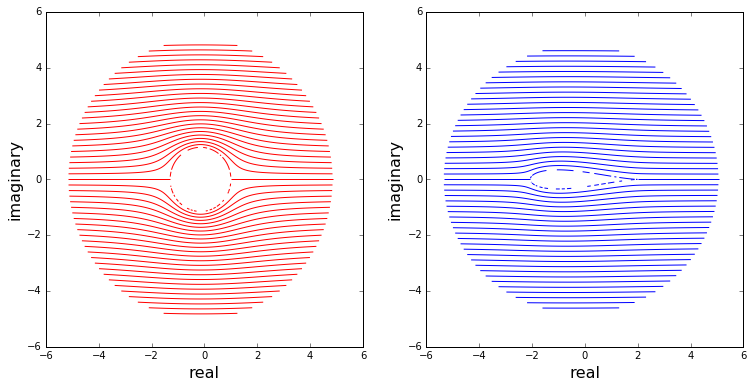

In [9]:
uinf = 1
vinf = 0
xd = xc
yd = yc

k = (radius**2)*(2*numpy.pi*uinf)

psidub = getstreamfuncdub(k,xd,yd,z.real,z.imag)
psifs = uinf*z.imag
psi = psidub + psifs

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(2.5*size,1.2*size))
pyplot.subplot(121)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(z.real, z.imag, psi, levels=levels, colors='r', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='b', linewidths=1, linestyles='solid');

In [10]:
# 1. Strength of doublet
print('k = ' + str(k))

k = 8.309512568745001


\begin{equation}
W_\xi = u_\xi - iv_\xi = \frac{d F}{d \xi} = \frac{d F}{d z}\times\frac{d z}{d \xi} = \frac{d F}{d z}/\frac{d \xi}{d z} = (u_z-iv_z) / \frac{d \xi}{d z}
\end{equation}

And

\begin{equation}
\frac{d \xi}{d z} = \frac{d (z + c^2/z)}{dz} = 1 - \left(\frac{c}{z}\right)^2
\end{equation}

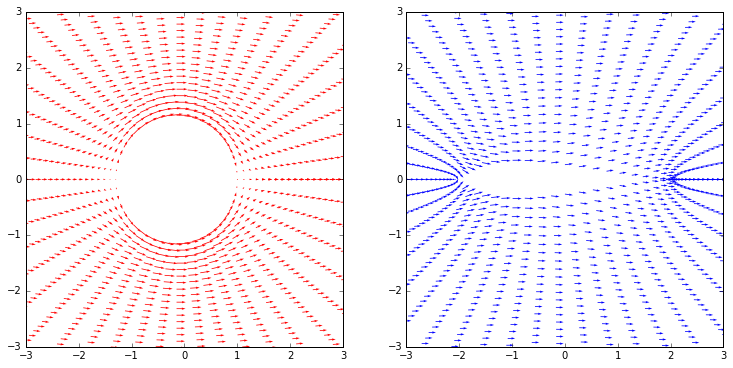

In [11]:
udub, vdub = getveldub(k,xd,yd,z.real,z.imag)

ufs = uinf*numpy.ones(numpy.shape(z.real))
vfs = numpy.zeros(numpy.shape(z.imag))

u = udub + ufs
v = vdub + vfs

p = 3
size = 5
pyplot.figure(figsize=(2.5*size,1.2*size))
pyplot.subplot(121)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(z.real[::p, ::p],z.imag[::p, ::p],u[::p, ::p],v[::p, ::p],scale=10,scale_units='inches',color='r')

xivel = (u - v*1j)/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::p, ::p],xi.imag[::p, ::p],xivel.real[::p, ::p],xivel.imag[::p, ::p],scale=10,scale_units='inches',color='b')

In [13]:
# 2. Velocity at 62th point on surface

print('u = ' + str(xivel.real[61,0]))
print('v = ' + str(xivel.imag[61,0]))

u = 1.10633846629
v = -0.523633349298


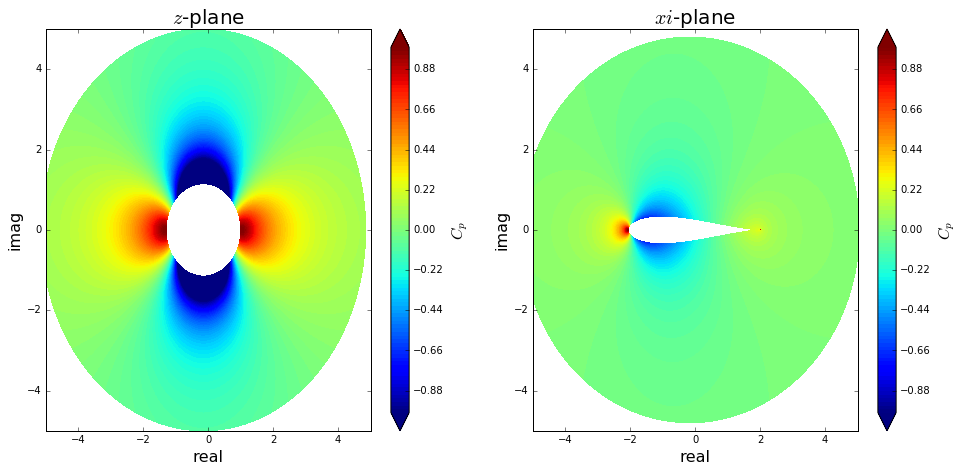

In [14]:
# z plane
cp = 1.0 - (u**2+v**2)/uinf**2

# plot the pressure coefficient field
size = 8
pyplot.figure(figsize=(2*size, 0.9*size))
pyplot.subplot(121)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

# xi plane
cp2 = 1.0 - (xivel.real**2+xivel.imag**2)/uinf**2

pyplot.subplot(122)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$xi$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(xi.real, xi.imag, cp2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

In [15]:
# 3. minimum value of Cp on airfoil surface

cp2min = numpy.amin(cp2[:,0])
print(cp2min)

-0.687755674092


# 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

## Homework Questions

* Write Python code to obtain the figures as shown above. Set the angle of attack as $AoA=20^\circ$.
* Answer the following questions:
    1. Do you think the flow over the airfoil we obtained here is reasonable? Why or why not?
    2. Where are the stagnation points on the airfoil? Assume we index the trailing edge as the 1<sup>st</sup> point and index the points counterclockwise.
    3. How much is the lift?
    4. How much is the drag?
    5. What is the velocity at the 50<sup>th</sup> point on the airfoil surface? 
    6. What is the pressure coefficient at the 75<sup>th</sup> point on the airfoil surface?


Numerical answers in the auto-graded homework in our [Open edX course](http://openedx.seas.gwu.edu/courses/GW/MAE6226/2014_spring/about) need to be entered with two digits after the decimal point.

\begin{equation}
z'=\left[ z-(x_c+iy_c) \right]e^{-i\times AoA}
\end{equation}


Explicitly expressed in $x$, $y$, $x'$, and $y'$:

\begin{equation}
\left\{
\begin{array}{l}
x' = (x-x_c)\cos(AoA) + (y-y_c)\sin(AoA) \\
y' = - (x-x_c)\sin(AoA) + (y-y_c)\cos(AoA)
\end{array}
\right.
\end{equation}


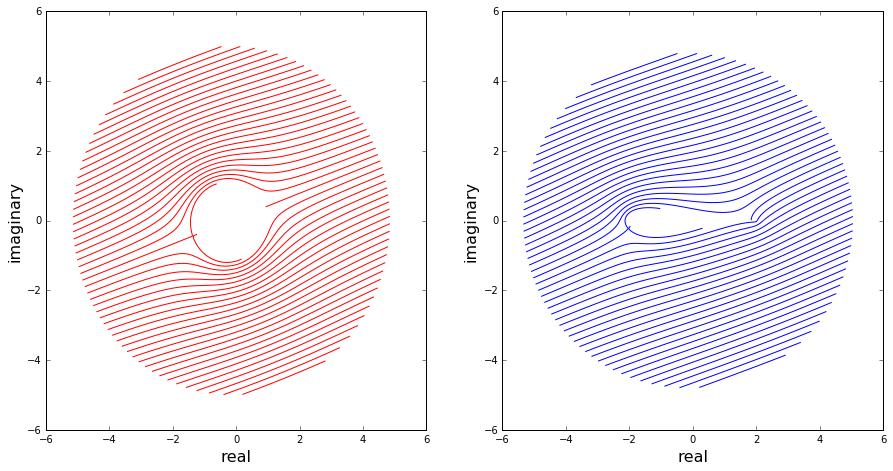

In [17]:
aoa = math.radians(20)
zprime = (z - (xc + yc*1j))*numpy.exp(-1j*aoa)

psidub = getstreamfuncdub(k,xd,yd,zprime.real,zprime.imag)
psifs = uinf*zprime.imag
psi = psidub + psifs

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(3*size,1.5*size))
pyplot.subplot(121)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(z.real, z.imag, psi, levels=levels, colors='r', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='b', linewidths=1, linestyles='solid');

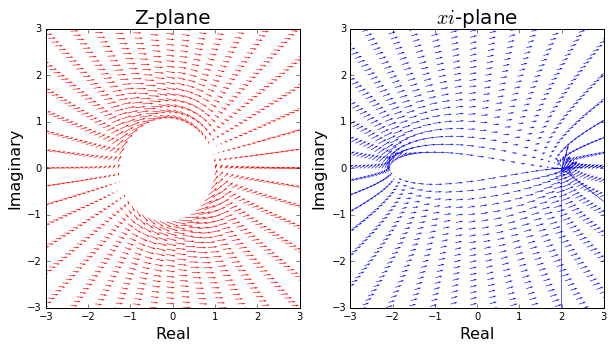

In [33]:
udub, vdub = getveldub(k,0,0,zprime.real,zprime.imag)

ufs = uinf*numpy.ones(numpy.shape(zprime.real))
vfs = numpy.zeros(numpy.shape(zprime.imag))

u = udub + ufs
v = vdub + vfs

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.quiver(z.real[::3,::3],z.imag[::3,::3],u[::3,::3],v[::3,::3],scale=10,scale_units='inches', color='red')

w = u - v*1j
velprime = (w*numpy.exp(-1j*aoa))/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('$xi$-plane', fontsize=20)
pyplot.quiver(xi.real[::3,::3],xi.imag[::3,::3],velprime.real[::3,::3],-velprime.imag[::3,::3],scale=10,scale_units='inches',color='blue');

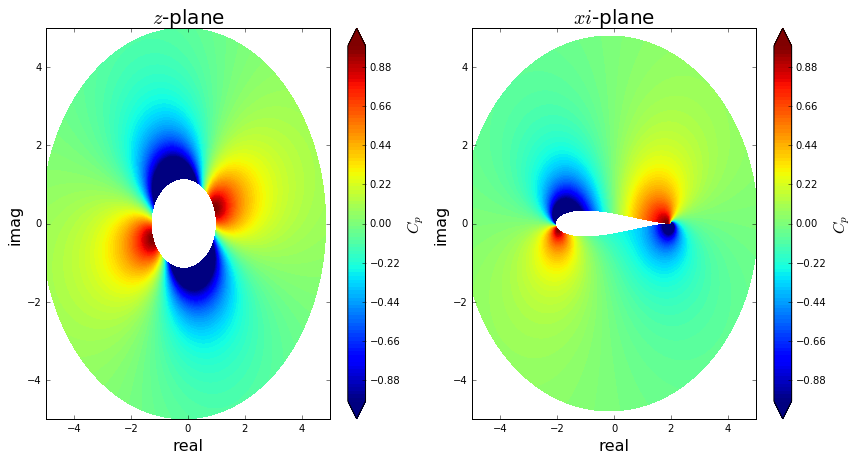

In [34]:
# z plane pressure coefficient field
cp = 1 - (u**2 + v**2)/uinf**2

size = 7

pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

# xi plane pressure coefficient field
cp2 = 1 - (velprime.real**2 + velprime.imag**2)/uinf**2

pyplot.subplot(122)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$xi$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(xi.real, xi.imag, cp2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

In [57]:
# 1. Is the flow reasonable? Why or why not? 
print('\n# ONE')
print('No; no resulting lift or drag')

# 2. Where are the stagnation points on the airfoil? 
print('\n# TWO')
cpmax = numpy.amax(cp)
point1, point2 = numpy.where(cp==cpmax)
print('stagnation points along [:,0]: ' + str(point1) + ', ' + str(point2))
        
# 3. What's the lift
print('\n# THREE')
print('Lift is 0')

# 4. What's the drag
print('\n# FOUR')
print('Drag is 0')

# 5 velocity at 50th point on airfoil surface
print('\n# FIVE')
print('x-velocity: ' + str(velprime.real[49,0]))
print('y-velocity: ' + str(velprime.imag[49,0]))

# 6 pressure coefficient at the 75th point on the airfoil surface
print('\n# SIX')
print('cp2[74,0]: ' + str(cp2[74,0]))


# ONE
No; no resulting lift or drag

# TWO
stagnation points along [:,0]: [89], [1]

# THREE
Lift is 0

# FOUR
Drag is 0

# FIVE
x-velocity: 1.48306541501
y-velocity: -0.0920754950073

# SIX
cp2[74,0]: -8.35981340841


# 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

   1. What is the strength of the vortex?
   2. What is the lift? (Hint: the direction of lift we learned in Lesson 6 is toward the normal direction of free stream, i.e., the $y'$-direction in our case. Don't forget that the direction of lift now is in the $y$-direction.)
   3. Try to calculate the lift and drag directly by $L=-\oint p \times \sin{\theta} dA$ and $D=\oint p \times \cos{\theta} dA$. Does the lift agree with the Kutta-Joukowski theorem? How much is the drag?
   4. Where are the stagnation points on the airfoil? Assume we index the trailing edge as the 1<sup>st</sup> point and index the points counterclockwise.    
   5. What is the velocity at the 92<sup>th</sup> point on the airfoil surface? 
   6. What is the pressure coefficient at the 111<sup>th</sup> point on the airfoil surface?
   7. What's going on with the pressure coefficient at the trailing edge of the airfoil?

In [39]:
gamma = 4*numpy.pi*uinf*R*numpy.sin(aoa)

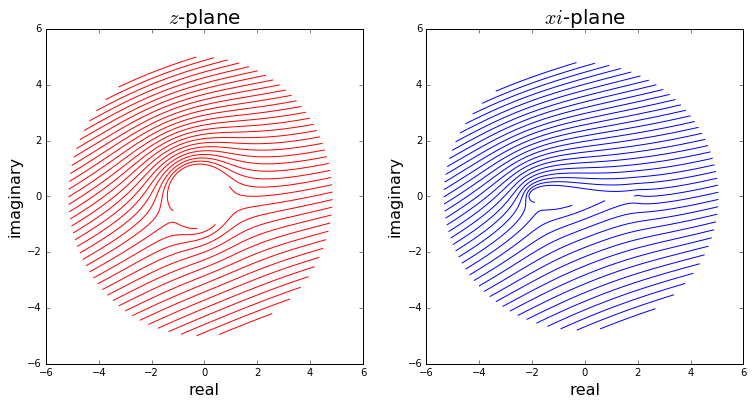

In [69]:
xc = 0
yc = 0

psivor = getstreamfuncvortex(gamma,xc,yc,z.real,z.imag)
psitotal = psi + psivor
levels = numpy.linspace(-psitotal.max(),psitotal.max(),51)

size = 5
pyplot.figure(figsize=(2.5*size,1.2*size))
pyplot.subplot(121)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$z$-plane',fontsize=20)
pyplot.contour(z.real, z.imag, psitotal, levels=levels, colors='red', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$xi$-plane',fontsize=20)
pyplot.contour(xi.real, xi.imag, psitotal, levels=levels, colors='blue', linewidths=1, linestyles='solid');

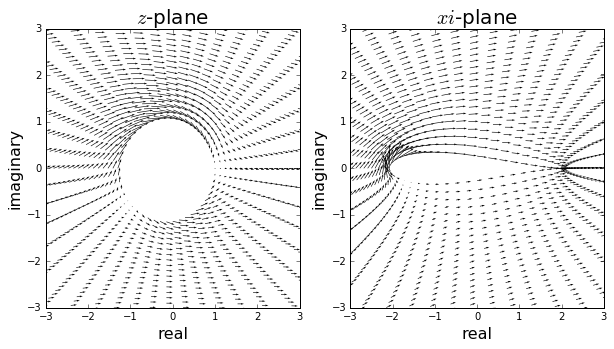

In [70]:
uvor, vvor = getvelvortex(gamma,xc,yc,zprime.real,zprime.imag)

utotal = u + uvor
vtotal = v + vvor

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$z$-plane',fontsize=20)
pyplot.quiver(z.real[::p,::p],z.imag[::p,::p],utotal[::p,::p],vtotal[::p,::p],scale=10,scale_units='inches')

w = utotal - vtotal*1j
xivel = (w*numpy.exp(-1j*aoa))/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$xi$-plane',fontsize=20)
pyplot.quiver(xi.real[::p,::p],xi.imag[::p,::p],xivel.real[::p,::p],-xivel.imag[::p,::p],scale=10,scale_units='inches');

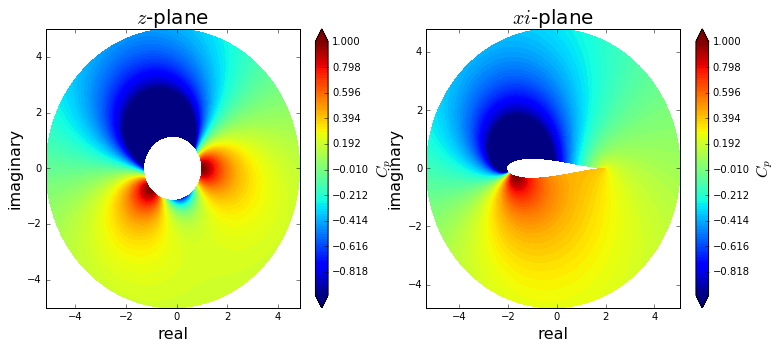

In [76]:
cp = 1 - (utotal**2 + vtotal**2)/uinf**2

pyplot.figure(figsize=(2.5*size,1*size))
pyplot.subplot(121)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$z$-plane',fontsize=20)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

cp2 = 1 - (xivel.real**2 + xivel.imag**2)/uinf**2

pyplot.subplot(122)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.title('$xi$-plane',fontsize=20)
contf = pyplot.contourf(xi.real, xi.imag, cp2, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

In [82]:
# 1. strength of vortex
print('\n# ONE')
print('gamma = \n\t' + str(gamma))

# 2. what is the lift? 
print('\n# TWO')
lift = uinf*gamma*numpy.cos(aoa)
print('lift value: \n\t' + str(lift))

# 3. what is the drag? 
print('\n# THREE')
drag = -uinf*gamma*numpy.sin(aoa)
print('drag value: \n\t' + str(drag))
print('\n\tThis is wrong, although I am unclear exactly why.')

# 4. indeces of stagnation points
print('\n# FOUR')
cpmax = numpy.amax(cp2)
point1, point2 = numpy.where(cp2==cpmax)
print('stagnation points along [:,0]: \n\t' + str(point1+1) + ', ' + str(point2+1))

# 5. velocity at 92th point on the airfoil surface
print('\n# FIVE')
print('x-velocity: \n\t' + str(xivel.real[91,0]))
print('y-velocity: \n\t' + str(xivel.imag[91,0]))

# 6. pressure coefficient at the 111th point on the airfoil surface
print('\n# SIX')
cp2_111 = cp2[110,0]
print('cp = \n\t' + str(cp2_111))


# ONE
gamma = 
	4.9426446604

# TWO
lift value: 
	4.64456671454

# THREE
drag value: 
	-1.69048403516

	This is wrong, although I am unclear exactly why.

# FOUR
stagnation points along [:,0]: 
	[89], [1]

# FIVE
x-velocity: 
	0.208483116207
y-velocity: 
	0.0319883891951

# SIX
cp = 
	0.496694672383
